<a href="https://colab.research.google.com/github/donneypr/cnn_number_identifier/blob/main/CNN_itdentifying_numbers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [165]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid
from sklearn.metrics import confusion_matrix

In [166]:
#We need to conver the mnist image files into tensors of the 4th dimension for the image, height, width and colour channel
transform = transforms.ToTensor()

In [167]:
#Train data
train_data = datasets.MNIST(root='/CNN_data', train=True, download=True, transform=transform)

In [168]:
#Testing the data
test_data = datasets.MNIST(root='/CNN_data', train=False, download=True, transform=transform)

In [169]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: /CNN_data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [170]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: /CNN_data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [171]:
#Createa small batch size for the images
train_loader = DataLoader(train_data, batch_size = 15 , shuffle = True)
test_loader = DataLoader(test_data, batch_size = 15 , shuffle = False)

In [172]:
#Define the Convoloutional Neural Network
conv1 = nn.Conv2d(1,6,3,1)
conv2 = nn.Conv2d(6,16,3,1)

In [173]:
#take 1 MNST record
for i, (X_train, y_train) in enumerate(train_data):
  break

In [174]:
class ConvoloutionalNeuralNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1,6,3,1)
    self.conv2 = nn.Conv2d(6,16,3,1)

    #Add fully connected layers
    self.fc1 = nn.Linear(5*5*16, 120)
    self.fc2 = nn.Linear(120,84)
    self.fc3 = nn.Linear(84,10)

    #Forward Function
  def forward(self, X):
    X = F.relu(self.conv1(X))
    X = F.max_pool2d(X,2,2)

    X = F.relu(self.conv2(X))
    X = F.max_pool2d(X,2,2)

    #Re-View data to flatten
    X = X.view(-1,16*5*5)

    #Connect layers
    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = self.fc3(X)

    return F.log_softmax(X, dim=1)

In [175]:
torch.manual_seed(32)
model = ConvoloutionalNeuralNetwork()
model

ConvoloutionalNeuralNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [176]:
#optimzer for loss function
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [177]:
import time
start_time = time.time()

# Create Variables To Tracks Things
epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []

# For Loop of Epochs
for i in range(epochs):
  trn_corr = 0
  tst_corr = 0


  # Train
  for b,(X_train, y_train) in enumerate(train_loader):
    b+=1 # start our batches at 1
    y_pred = model(X_train) # get predicted values from the training set. Not flattened 2D
    loss = criterion(y_pred, y_train) # how off are we? Compare the predictions to correct answers in y_train

    predicted = torch.max(y_pred.data, 1)[1] # add up the number of correct predictions. Indexed off the first point
    batch_corr = (predicted == y_train).sum() # how many we got correct from this batch. True = 1, False=0, sum those up
    trn_corr += batch_corr # keep track as we go along in training.

    # Update our parameters
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


    # Print out some results
    if b%600 == 0:
      print(f'Epoch: {i}  Batch: {b}  Loss: {loss.item()}')

  train_losses.append(loss)
  train_correct.append(trn_corr)


  # Test
  with torch.no_grad(): #No gradient so we don't update our weights and biases with test data
    for b,(X_test, y_test) in enumerate(test_loader):
      y_val = model(X_test)
      predicted = torch.max(y_val.data, 1)[1] # Adding up correct predictions
      tst_corr += (predicted == y_test).sum() # T=1 F=0 and sum away


  loss = criterion(y_val, y_test)
  test_losses.append(loss)
  test_correct.append(tst_corr)


current_time = time.time()
total = current_time - start_time
print(f'Training Took: {total/60} mins')

Epoch: 0  Batch: 600  Loss: 0.16495497524738312
Epoch: 0  Batch: 1200  Loss: 0.19736522436141968
Epoch: 0  Batch: 1800  Loss: 0.5326701402664185
Epoch: 0  Batch: 2400  Loss: 0.18861399590969086
Epoch: 0  Batch: 3000  Loss: 0.02514452114701271
Epoch: 0  Batch: 3600  Loss: 0.23381657898426056
Epoch: 1  Batch: 600  Loss: 0.011451526544988155
Epoch: 1  Batch: 1200  Loss: 0.03353869915008545
Epoch: 1  Batch: 1800  Loss: 0.1544206142425537
Epoch: 1  Batch: 2400  Loss: 0.008040203712880611
Epoch: 1  Batch: 3000  Loss: 0.007367588579654694
Epoch: 1  Batch: 3600  Loss: 0.06669604033231735
Epoch: 2  Batch: 600  Loss: 0.004382024984806776
Epoch: 2  Batch: 1200  Loss: 0.06244569271802902
Epoch: 2  Batch: 1800  Loss: 0.053326237946748734
Epoch: 2  Batch: 2400  Loss: 0.0036550939548760653
Epoch: 2  Batch: 3000  Loss: 0.051163189113140106
Epoch: 2  Batch: 3600  Loss: 0.0033643057104200125
Epoch: 3  Batch: 600  Loss: 0.015754612162709236
Epoch: 3  Batch: 1200  Loss: 0.0002650874957907945
Epoch: 3  Bat

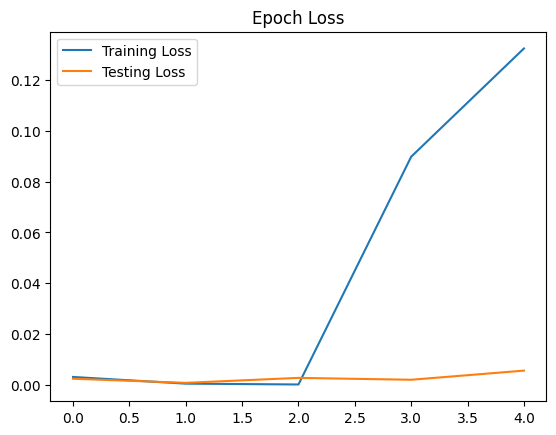

In [178]:
#Graphs results to view loss
train_losses = [tl.item() for tl in train_losses]
plt.plot(train_losses, label = "Training Loss")
plt.plot(test_losses, label = "Testing Loss")
plt.title("Epoch Loss")
plt.legend()

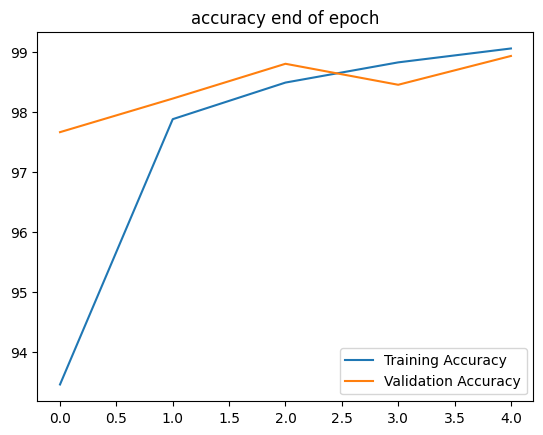

In [179]:
#graph the accuracy of the epoch
plt.plot([t/600 for t in train_correct], label ="Training Accuracy")
plt.plot([t/100 for t in test_correct], label = "Validation Accuracy")
plt.title("accuracy end of epoch")
plt.legend()



In [180]:
#data loader
test_load_everything = DataLoader(test_data, batch_size = 10000, shuffle = False)

In [181]:
with torch.no_grad():
  correct = 0
  for X_test, y_test in test_load_everything:
    y_val = model(X_test)
    predicted = torch.max(y_val, 1)[1]
    correct += (predicted == y_test).sum()

print(f'Test Accuracy: {correct.item()/10000}')

Test Accuracy: 0.9893


In [182]:
#check to see if its correct
print(f' Accuracy of the model is: {correct.item()/len(test_data)*100}')
#approx 99% correct

 Accuracy of the model is: 98.92999999999999


In [183]:
#use an image
#TEST DATA: PICK A NUMBER BETWEEN 1 - 10000
testing = test_data[1] #will provide a tensor with an image

In [184]:
#reshape
testing[0].reshape(28,28)

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.4549, 0.4902, 0.6706, 1.0000, 1.0000, 0.5882, 0.3647, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

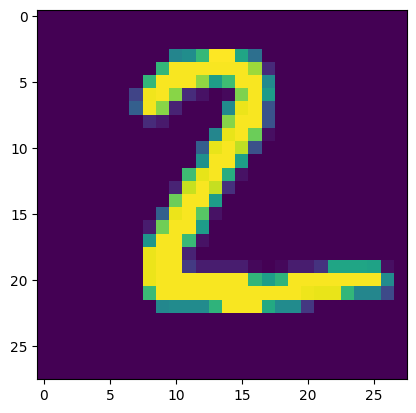

In [185]:
#showcase the image
plt.imshow(testing[0].reshape(28,28))

In [186]:
#pass the image through the model
model.eval()
with torch.no_grad():
  new_pred = model(testing[0].view(1,1,28,28)) #batch size of 1, 1 colour channel 28x28 image.

In [187]:
#evaluate
new_pred.argmax().item()

2